# Q1

In [4]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

def train_perceptron(X, y, learning_rate=0.1, epochs=10):
  weights = np.random.rand(2)
  bias = np.random.rand(1)

  for epoch in range(epochs):
        for i in range(len(y)):
            weighted_sum = np.dot(X[i], weights) + bias
            prediction = step_function(weighted_sum)


            error = y[i] - prediction
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            return weights, bias


weights, bias = train_perceptron(X, y)


for i in range(len(y)):
    weighted_sum = np.dot(X[i], weights) + bias
    prediction = step_function(weighted_sum)
    print(f"Input: {X[i]} - Predicted: {prediction} - Actual: {y[i]}")





Input: [0 0] - Predicted: [1] - Actual: 0
Input: [0 1] - Predicted: [1] - Actual: 1
Input: [1 0] - Predicted: [1] - Actual: 1
Input: [1 1] - Predicted: [1] - Actual: 0


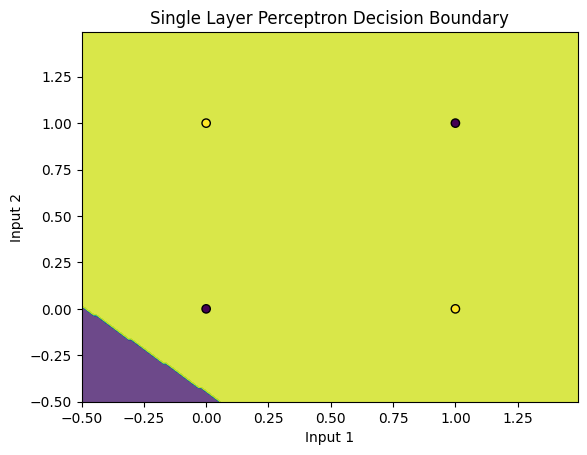

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Plot function to visualize decision boundary
def plot_decision_boundary(X, y, weights, bias):
    # Create a meshgrid of points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Calculate the decision boundary
    Z = step_function(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the XOR points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("Single Layer Perceptron Decision Boundary")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

# Visualize the Single Layer Perceptron
plot_decision_boundary(X, y, weights, bias)


The XOR function is not linearly separable, meaning a single perceptron cannot learn XOR properly.

In [8]:
# Multi-Layer Perceptron for XOR
import torch
import torch.nn as nn
import torch.optim as optim

class MLP_XOR(nn.Module):
    def __init__(self):
        super(MLP_XOR, self).__init__()
        self.hidden = nn.Linear(2, 2)  # 2 input features, 2 hidden neurons
        self.output = nn.Linear(2, 1)  # 2 hidden neurons, 1 output

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

# Convert data to PyTorch tensors
X_xor_tensor = torch.tensor(X, dtype=torch.float32)
y_xor_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Instantiate the MLP for XOR
model_xor = MLP_XOR()
criterion_xor = nn.MSELoss()
optimizer_xor = optim.SGD(model_xor.parameters(), lr=0.1)

# Train the MLP for XOR
epochs_xor = 10000
for epoch in range(epochs_xor):
    optimizer_xor.zero_grad()
    output_xor = model_xor(X_xor_tensor)
    loss_xor = criterion_xor(output_xor, y_xor_tensor)
    loss_xor.backward()
    optimizer_xor.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{epochs_xor} Loss: {loss_xor.item()}')

# Test the trained MLP for XOR
with torch.no_grad():
    predictions_xor = model_xor(X_xor_tensor).round()
    print("XOR Predictions after training:", predictions_xor)

<ipython-input-8-c50188e660ac>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_xor_tensor = torch.tensor(X, dtype=torch.float32)
<ipython-input-8-c50188e660ac>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_xor_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


Epoch 0/10000 Loss: 0.25757157802581787
Epoch 1000/10000 Loss: 0.24905624985694885
Epoch 2000/10000 Loss: 0.2474239468574524
Epoch 3000/10000 Loss: 0.2422371804714203
Epoch 4000/10000 Loss: 0.22848303616046906
Epoch 5000/10000 Loss: 0.20406827330589294
Epoch 6000/10000 Loss: 0.1775258183479309
Epoch 7000/10000 Loss: 0.14012256264686584
Epoch 8000/10000 Loss: 0.07797057181596756
Epoch 9000/10000 Loss: 0.03749383985996246
XOR Predictions after training: tensor([[0.],
        [1.],
        [1.],
        [0.]])


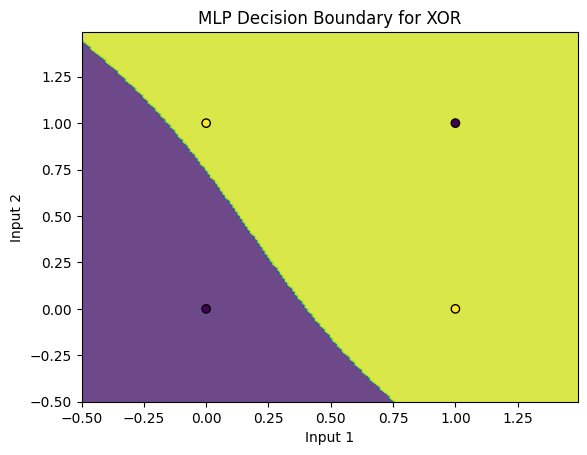

In [10]:
# Plot function for Multi-Layer Perceptron
def plot_mlp_decision_boundary(X, y, model):
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Convert meshgrid to tensor
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    # Predict using the MLP model
    with torch.no_grad():
        Z = model(grid)
        Z = Z.round().numpy().reshape(xx.shape)

    # Plot decision boundary and XOR points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("MLP Decision Boundary for XOR")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

# Visualize the Multi-Layer Perceptron
X_numpy = X.numpy()  # Convert torch Tensor to numpy for plotting
y_numpy = y.numpy().flatten()
plot_mlp_decision_boundary(X_numpy, y_numpy, model)


the XOR function is linearly separated with the help of multi level perceptron.

# Q2B

In [10]:
import pandas as pd

# Load the uploaded IMDb dataset to inspect its contents

imdb_data = pd.read_excel('/content/IMDB_dataset.xlsx')

# Display the first few rows of the dataset to understand its structure
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


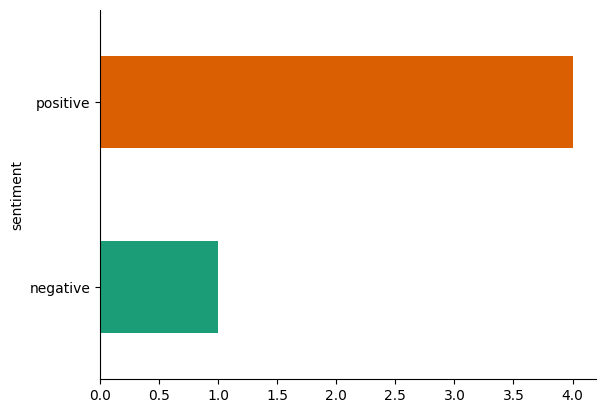

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
pip install tensorflow

In [5]:

import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Text preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

# Preprocess the reviews
imdb_data['review'] = imdb_data['review'].apply(preprocess_text)

# Encode the sentiment labels (positive -> 1, negative -> 0)
label_encoder = LabelEncoder()
imdb_data['sentiment'] = label_encoder.fit_transform(imdb_data['sentiment'])

# Tokenize the reviews
tokenizer = Tokenizer(num_words=10000)  # Use the top 10,000 words
tokenizer.fit_on_texts(imdb_data['review'])
sequences = tokenizer.texts_to_sequences(imdb_data['review'])

# Pad the sequences to ensure uniform input size
max_len = 200  # Set maximum sequence length (truncating long reviews, padding shorter ones)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, imdb_data['sentiment'], test_size=0.2, random_state=42)

# Display shapes of training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (399, 200)
Test set shape: (100, 200)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Flatten

# Define the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))

# First hidden layer (fully connected with ReLU activation)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization

# Flatten layer to ensure the output shape matches the target
model.add(Flatten()) # Add this line

# Output layer (sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.5240 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7490 - loss: 0.6499 - val_accuracy: 0.4800 - val_loss: 0.6935
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9195 - loss: 0.6144 - val_accuracy: 0.4400 - val_loss: 0.6957
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8776 - loss: 0.5598 - val_accuracy: 0.5200 - val_loss: 0.7017
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8813 - loss: 0.4982 - val_accuracy: 0.4800 - val_loss: 0.6997
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.4774 - loss: 0.7027
Test Accuracy: 0.4800


Justifications:

ReLU Activation: Used in hidden layers to avoid vanishing gradient problems and enable faster learning.

Sigmoid Activation: Used in the output layer to map predictions to a probability between 0 and 1, suitable for binary classification.



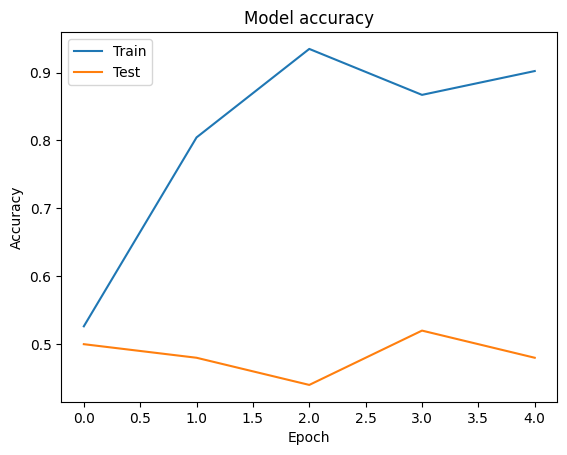

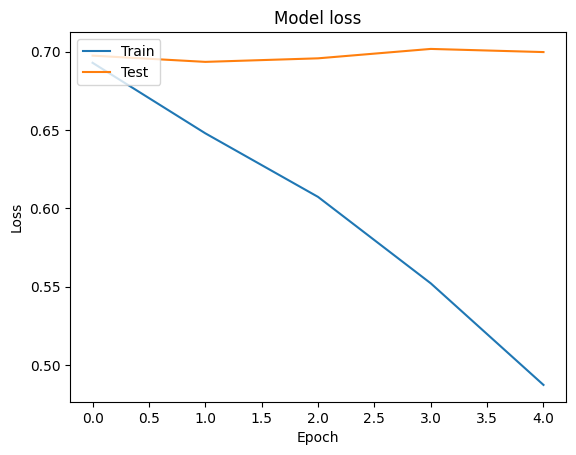

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Binary Cross-Entropy Loss: This is a standard loss function for binary classification tasks as it measures the performance of a model whose output is a probability between 0 and 1.

Binary cross-entropy compares the predicted probability distribution from the model to the true labels (either 0 or 1 in binary classification). It measures the performance by calculating the difference between the predicted and actual label probabilities.



